In [7]:
'''
quick python tip.

Say you have a loop and you are appending to a list:
'''
newlist = []
for i in range(10):
    newlist.append(i*2)
print(newlist)

'''
There is shorthand for that.
It's called a list comprehension
'''
newlist2 = [i*2 for i in range(10)]
print(newlist2)
products = [i*j for i in range(5) for j in range(10)]
print(products)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 0, 4, 8, 12, 16, 20, 24, 28, 32, 36]


In [9]:
from music21 import *
#configure.run()
# https://mta.mit.edu/person/michael-scott-cuthbert
# http://web.mit.edu/music21/doc/usersGuide/usersGuide_20_examples2.html

In [12]:
'''
J.S. Bach usually ends pieces in minor with a major chord, 
generally called a “Picardy third,” but does he ever end pieces in minor?
Let’s look through the chorales to find out. We’ll start by using the 
corpus.search method to get all the pieces by Bach:
'''

# 412 appear, seems not totally perfect.
chorales = corpus.search('bach', fileExtensions='xml')
print(chorales)

<music21.metadata.bundles.MetadataBundle {412 entries}>
<music21.metadata.bundles.MetadataEntry: bach_bwv1_6_mxl>


<music21.metadata.bundles.MetadataEntry: bach_bwv1_6_mxl>


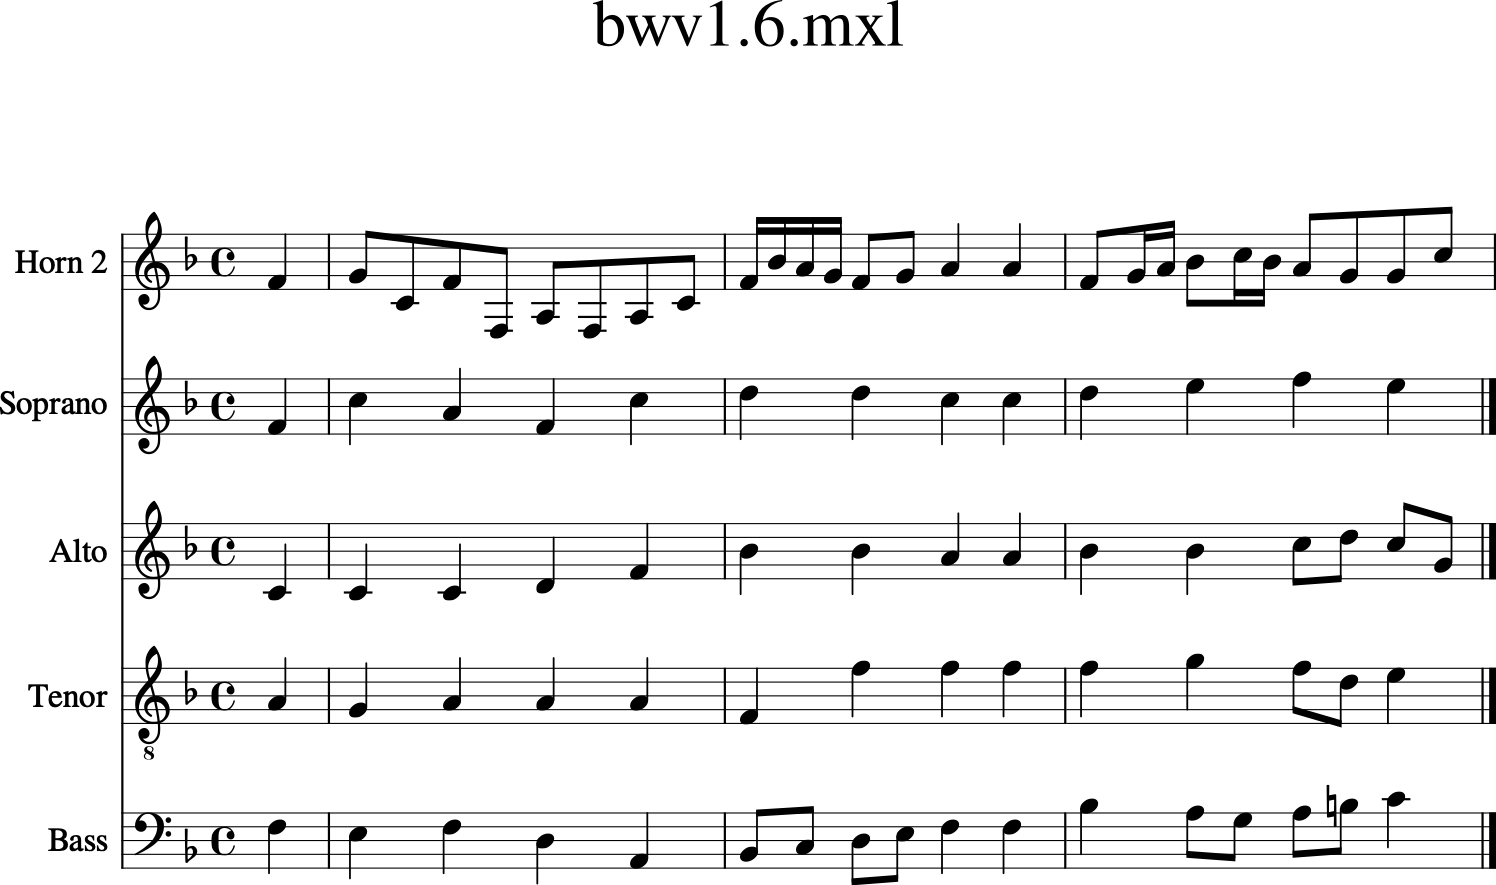

In [13]:
print(chorales[0])
bwv1 = chorales[0].parse()
bwv1.measures(0, 3).show()

In [ ]:
bwv1.analyze('key')

In [ ]:
for i, chorale in enumerate(chorales[:20]):
    cScore = chorale.parse()
    if cScore.analyze('key').mode == 'minor':
        print(i, chorale)

In [ ]:
bwv10 = corpus.parse('bwv10')
bwv10.measures(0, 5).show()

In [ ]:
soprano = bwv10.parts[0]
print(len(soprano.getElementsByClass('Measure')))

In [ ]:
bwv10.measures(21, 22).show()


In [ ]:
'''
Looks like a nice Picardy third here. 
But let’s see if music21 can figure out that it’s a major chord. 
We could chordify the last measure, 
but let’s instead get the last pitch from each part:
'''
lastPitches = []
for part in bwv10.parts:
    lastPitch = part.pitches[-1]
    lastPitches.append(lastPitch)
print(lastPitches)

In [ ]:
c = chord.Chord(lastPitches)
c.duration.type = 'whole'
c.show()

In [ ]:
'''
This could get ugly fast if the bass were any lower and the soprano 
were any higher, so let’s put it in closed position:
'''
cClosed = c.closedPosition()
cClosed.show()

In [ ]:
print(cClosed.isMajorTriad())
print(cClosed.root())

In [ ]:
'''
Let’s say that we’re only interested in chords that end 
on the same root pitched as the analyzed key, so we can test for that too:
'''
print(bwv10.analyze('key').tonic.name)
print(cClosed.root().name)

In [ ]:

'''
So we’ve figured out that BWV 10’s chorale does what we generally
 expect Bach to do. But where are the exceptions? Let’s look through 
 the whole repertory and look for them.

Let’s take some of the things that we’ve already done and 
make them into little functions. First the function to get the last chord from a score:

'''
def getLastChord(score):
    lastPitches = []

    for part in score.parts:
        lastPitch = part.pitches[-1]
        lastPitches.append(lastPitch)

    c = chord.Chord(lastPitches)
    c.duration.type = 'whole'

    cClosed = c.closedPosition()
    return cClosed

getLastChord(bwv10)


In [ ]:
'''
Okay, now let’s write a routine that takes in a 
score and sees if it is relevant. It needs to be:

- in minor
- have a minor last chord
- have the root of the last chord be the same as the tonic of the analyzed key.
- Let’s try that, and return False if the piece is not relevant, 
but return the last chord if it is.

'''
def isRelevant(score):
    analyzedKey = score.analyze('key')
    
    # need minor
    if analyzedKey.mode != 'minor':
        return False
    
    lastChord = getLastChord(score)
    
    # if major (this is a picardy 3rd)
    if not lastChord.isMinorTriad():
        return False
    
    # changed keys
    if lastChord.root().name != analyzedKey.tonic.name:
        return False
    else:
        return lastChord
    
relevantStream = stream.Stream()
relevantStream.append(meter.TimeSignature('4/4'))

for chorale in chorales:
    score = chorale.parse()
    falseOrChord = isRelevant(score)
    if falseOrChord is not False:
        theChord = falseOrChord # rename for clarity
        theChord.lyric = score.metadata.title
        relevantStream.append(theChord)

relevantStream.show()

In [ ]:
'''
This is fun information to know about, but it’s only here that 
the real research begins. What about these pieces makes them special? 
Well, BWV 111 was a cantata that was missing its chorale, 
so this has been traditionally added, but it’s not definitively by Bach 
(the same chorale melody in the St. Matthew Passion has a Picardy third). 

In fact, when we show the Chorale iterator later, it is a piece automatically 
skipped for that reason. BWV 248 is the Christmas oratorio 
(in the music21 corpus twice, with and without continuo). 

It definitely is a minor triad in the original manuscript, possibly because
it does not end a section and instead goes back to the chorus da capo.


But what about the remaining seven examples?
They all have BWV numbers above 250, so they are part of the settings 
of chorales that were not connected to cantatas, sometimes called 
“orphan chorales.” Their possible use (as composition exercises? 
as studies for a proposed second Schemelli chorale aria collection?)
and even their authenticity has been called into question before.
But the data from the music21 collection argues against one hypothesis, 
that they were parts of otherwise lost cantatas that would have been similar
to the existing ones. No surviving cantata ends like these chorales do, 
so the evidence points to the idea that the orphan chorales were different 
in some other way than just being orphans, either as evidence that Bach’s
style had changed by the time he wrote them, or that they are not by Bach.
'''
print("...")


In [ ]:
# gap fill
'''
In a remarkable set of articles and other 
works from 1998-2000, Paul von Hippel explored 
the concept of “Gap-Fill,” or the supposed idea 
that after a large leap in the melody, the listener 
expects that the following motion will be in the opposite 
direction, thereby filling the gap that was just created. 
Hippel’s work compared melodic motion to the average note 
height in a melody. When the melody leaps up it is often 
above the mean so there are more pitches available below 
the current note than above. Similarly, when it leaps down, 
it is often below the mean, so there are more pitches above 
the current note than below. Hippel’s work showed that much 
or all of what we perceive to be gap-fill can be explained 
by “regression to the mean.” (The work is summarized 
beautifully in chapters 5 & 6 of David Huron’s book Sweet 
Anticipation). But there are many repertories that have not 
yet been explored. Let us see if there is a real Gap Fill 
or just regression to the mean in one piece of early fifteenth 
century music, using Interval objects as a guide.

First let’s parse a piece that has been unedited except
in the music21 corpus, a Gloria in the manuscript Bologna Q15 
(image available) by a composer named “D. Luca”.

'''
from music21 import *

luca = corpus.parse('luca/gloria')
luca.measures(1, 7).show()


In [ ]:
cantus = luca.parts['Cantus']
cantus.measures(1, 20).show()

In [ ]:
'''
Let us figure out the average pitch height 
in the excerpt by recursing through all the
Note objects and finding getting the average of the 
.ps value, where Middle C = 60. (Similar to the .midi value)
'''
totalNotes = 0
totalHeight = 0
for n in cantus.recurse().getElementsByClass('Note'):
    totalNotes += 1
    totalHeight += n.pitch.ps
averageHeight = totalHeight/totalNotes
print(averageHeight)

averageNote = note.Note()
averageNote.pitch.ps = round(averageHeight)
averageNote.show()

In [ ]:
exactAveragePitch = pitch.Pitch(ps=averageHeight)
print(exactAveragePitch.step)
print(exactAveragePitch.accidental)
print(exactAveragePitch.microtone)

In [ ]:
import statistics
print(statistics.mean([p.ps for p in cantus.pitches]))
print(statistics.median([p.ps for p in cantus.pitches]))
medianHeight = statistics.median([p.ps for p in cantus.pitches])

In [ ]:
'''
Okay, now let us get all the intervals in a piece. 

We’ll do this in an inefficient but easy to follow manner 

first and then later we can talk about adding efficiencies. 

We’ll recurse through the Part object and get the .next() 

Note object each time and create an interval for it.

'''
allIntervals = []
for n in cantus.recurse().getElementsByClass('Note'):
    nextNote = n.next('Note')
    if nextNote is None: # last note of the piece
        continue
    thisInterval = interval.Interval(n, nextNote)
    allIntervals.append(thisInterval)
print(allIntervals[0:5])


In [ ]:
print(len(allIntervals))
print(len(cantus.recurse().getElementsByClass('Note')))

In [ ]:
'''
Let’s look at that first Interval object in a bit more
detail to see some of the things that might be useful:
'''
firstInterval = allIntervals[0]
print(firstInterval.noteStart)
print(firstInterval.noteEnd)
print(firstInterval.direction)

In [ ]:
'''
We are only going to be interested in intervals 
of a third or larger, so let’s review how to find 
generic interval size:
'''

print(firstInterval.generic)
print(firstInterval.generic.directed)
secondInterval = allIntervals[1]
print(secondInterval.generic.directed)
print(secondInterval.generic.undirected)

In [ ]:
'''
In order to see whether gap-fill or regression
to the mean is happening at any given moment, 
we need to only look at leaps up that after the leap 
are still below the mean or leaps down that finish 
above the mean. For instance, if a line leaps up and 
is above the mean then both the gap-fill and the regression 
to the mean hypothesis would predict a downward motion for the
next interval, so no knowledge would be gained. 
But if the line leaps up and is below the mean then the 
gap-fill hypothesis would predict downward motion,
but the regression to the mean hypothesis would predict 
upward motion for the next interval. So motion like this 
is what we want to see.

Let’s define a function called relevant() 
that takes in an interval and says whether it is big enough 
to matter and whether the gap-fill and regression hypotheses 
predict different motions:

'''
def relevant(thisInterval):
    if thisInterval.generic.undirected < 3:
        return False
    noteEndPs = thisInterval.noteEnd.pitch.ps
    if thisInterval.direction == interval.Direction.ASCENDING and noteEndPs < medianHeight:
        return True
    elif thisInterval.direction == interval.Direction.DESCENDING and noteEndPs > medianHeight:
        return True
    else:
        return False
    
print([relevant(i) for i in allIntervals].count(True))
print([relevant(i) for i in allIntervals[0:10]])


In [ ]:
'''
The third interval is relevant. 
Let’s review what that interval is. 
It’s the C5 descending to A4, still above 
the average note G4. Gap-fill predicts that 
the next note should be higher, 
regression predicts that it should be lower.
'''
cantus.measures(1, 3).show()

In [ ]:
'''
In this case, the regression to the mean hypothesis
is correct and the gap-fill hypothesis is wrong.
But that’s just one case, and these sorts of tests 
need to take in many data points. 

So let us write a function that takes in a relevant interval
and the following interval and says whether gap-fill or 
regression is correct. We will return 1 if gap-fill is correct,
2 if regression is correct, or 0 if the next interval is the 
same as the current.
'''

def whichHypothesis(firstInterval, secondInterval):
    if secondInterval.direction == interval.Direction.OBLIQUE:
        return 0
    elif secondInterval.direction != firstInterval.direction:
        return 1
    else:
        return 2
    
print(whichHypothesis(allIntervals[2], allIntervals[3]))



In [ ]:
'''
We can run this analysis on the small dataset of 32 relevant
intervals in the cantus part. We will store our results 
in a three-element list containing the number of oblique 
intervals, the number that fit the gap-fill hypothesis, 
and the number which fit the regression hypothesis:  
'''

obliqueGapRegression = [0, 0, 0]

for i in range(len(allIntervals) - 1):
    thisInterval = allIntervals[i]
    nextInterval = allIntervals[i + 1]
    if not relevant(thisInterval):
        continue
    hypothesis = whichHypothesis(thisInterval, nextInterval)
    obliqueGapRegression[hypothesis] += 1

obliqueGapRegression, obliqueGapRegression[1] - obliqueGapRegression[2]
    
    
    

In [ ]:
'''
So for this small set of data, 
gap-fill is more predictive than regression. 
Let’s run it on the whole piece. First we will need to
redefine relevant to take the average pitch height as a parameter.
'''
def relevant2(thisInterval, medianHeight):
    if thisInterval.generic.undirected < 3:
        return False
    noteEndPs = thisInterval.noteEnd.pitch.ps
    if thisInterval.direction == interval.Direction.ASCENDING and noteEndPs < medianHeight:
        return True
    elif thisInterval.direction == interval.Direction.DESCENDING and noteEndPs > medianHeight:
        return True
    else:
        return False




In [ ]:
'''
And let’s define a function that computes hypothesisTotal
for a single part.
'''
def onePartHypothesis(part):
    obliqueGapRegression = [0, 0, 0]

    medianHeight = statistics.median([p.ps for p in part.pitches])
    allIntervals = []
    for n in part.recurse().getElementsByClass('Note'):
        nextNote = n.next('Note')
        if nextNote is None: # last note of the piece
            continue
        thisInterval = interval.Interval(n, nextNote)
        allIntervals.append(thisInterval)

    for i in range(len(allIntervals) - 1):
        thisInterval = allIntervals[i]
        nextInterval = allIntervals[i + 1]
        if not relevant2(thisInterval, medianHeight):
            continue
        hypothesis = whichHypothesis(thisInterval, nextInterval)
        obliqueGapRegression[hypothesis] += 1

    return obliqueGapRegression

print(onePartHypothesis(cantus))

In [ ]:
obliqueGapRegression = [0, 0, 0]

for p in luca.parts:
    onePartTotals = onePartHypothesis(p)
    obliqueGapRegression[0] += onePartTotals[0]
    obliqueGapRegression[1] += onePartTotals[1]
    obliqueGapRegression[2] += onePartTotals[2]

obliqueGapRegression, obliqueGapRegression[1] - obliqueGapRegression[2]

In [ ]:
'''
The lower two parts overwhelm the first part and 
it is looking like regression to the mean is ahead.
But it’s only one piece! Let’s see if there are other 
similar pieces in the corpus. There’s a collection of
works from the 14th century,
mostly Italian works:
'''
print(corpus.search('trecento'))

obliqueGapRegression = [0, 0, 0]

for trecentoPieceEntry in corpus.search('trecento')[:20]:
    parsedPiece = trecentoPieceEntry.parse()
    for p in parsedPiece.parts:
        onePartTotals = onePartHypothesis(p)
        obliqueGapRegression[0] += onePartTotals[0]
        obliqueGapRegression[1] += onePartTotals[1]
        obliqueGapRegression[2] += onePartTotals[2]

print(obliqueGapRegression, obliqueGapRegression[1] - obliqueGapRegression[2])




In [ ]:
'''
So it looks like neither the gap-fill
hypothesis or the regression to the mean hypothesis 
are sufficient in themselves to explain melodic motion 
in this repertory. In fact, a study of the complete 
encoded works of Palestrina (replace ‘trecento’ with 
‘palestrina’ in the search and remove the limitation of 
only looking at the first 20, and wait half an hour) 
showed that there were 19,012 relevant instances, with 
3817 followed by a unison, but 7751 exhibiting gap-fill 
behavior and only 7444 following regression to the mean, 
with a difference of 2.1%. This shows that regression to 
the mean cannot explain all of the reversion after a leap
behavior that is going on in this repertory. I’m disappointed 
because I loved this article, but it’ll come as a relief to 
most teachers of modal counterpoint.

Whew! There’s a lot here in these two examples, 
and I hope that they point to the power of corpus 
analysis with music21, but we still have quite a lot 
to sort through, so we might as well continue by 
understanding how music21 sorts objects in Chapter 21: :
Ordering and Sorting of Stream Elements.

'''